<a href="https://www.kaggle.com/code/wandererfakeer/07-job-postings-trend-for-top-3-data-jobs-india?scriptVersionId=190871972" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/data-jobs-by-lukebarousse/data_jobs.csv")

df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [3]:
#converting string date to datetime object
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)

df["job_posted_date"].head()

0   2023-06-16 13:44:15
1   2023-01-14 13:18:07
2   2023-10-10 13:14:55
3   2023-07-04 13:01:41
4   2023-08-07 14:29:36
Name: job_posted_date, dtype: datetime64[ns]

In [4]:
#creating a new column - "job_posted_month", which extracts the month with proper format
df["job_posted_month"] = df.job_posted_date.dt.to_period("M")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [5]:
#creating a new dataframe with information about only one country
india = df[df["job_country"] == "India"]

india.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,NaN,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'...",2023-06
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,NaN,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",2023-04
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,NaN,NaN,NaN,Exusia,NaN,NaN,2023-03


In [6]:
#pivot table groupbe by "job_posted_month" and "job_title_short"
india_number_of_jobs_by_month = india.pivot_table(index = "job_posted_month", columns = "job_title_short", aggfunc = "size")

india_number_of_jobs_by_month

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
2023-01,175,31,628,2132,1444,70,127,448,269,192
2023-02,143,35,433,1631,932,42,94,313,165,157
2023-03,116,37,422,1591,1005,34,96,351,194,180
2023-04,170,32,418,1566,946,54,86,375,194,169
2023-05,103,14,278,1384,837,31,59,329,134,98
2023-06,146,26,367,1632,1129,41,66,427,238,125
2023-07,142,25,457,1528,1123,54,75,359,204,155
2023-08,189,25,618,1407,1157,47,126,343,235,148
2023-09,155,34,630,1508,984,67,85,324,195,132


In [7]:
#check the top 3 most posted jobs
top_job_counts = india["job_title_short"].value_counts().head(3).index

#convert the core index to list
top_job_counts = top_job_counts.tolist()

top_job_counts

['Data Engineer', 'Data Scientist', 'Data Analyst']

In [8]:
india_top_3_jobs = india_number_of_jobs_by_month[top_job_counts]

india_top_3_jobs

job_title_short,Data Engineer,Data Scientist,Data Analyst
job_posted_month,,,
2023-01,2132,1444,628
2023-02,1631,932,433
2023-03,1591,1005,422
2023-04,1566,946,418
2023-05,1384,837,278
2023-06,1632,1129,367
2023-07,1528,1123,457
2023-08,1407,1157,618
2023-09,1508,984,630


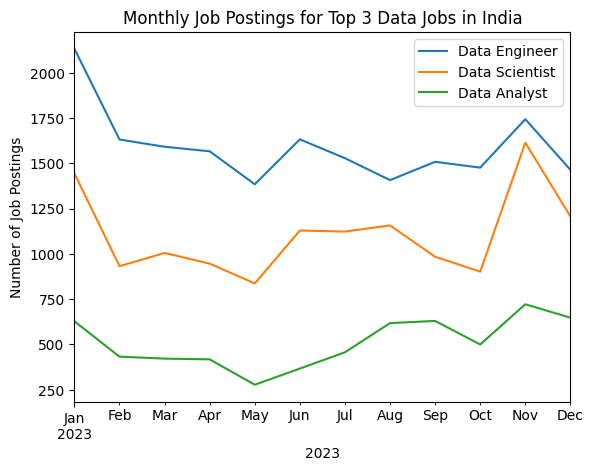

In [9]:
india_top_3_jobs.plot(kind = "line")

plt.title("Monthly Job Postings for Top 3 Data Jobs in India")

plt.xlabel("2023")

plt.ylabel("Number of Job Postings")

plt.legend()

plt.show()